In [32]:
import pandas as pd 
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt

In [10]:
output_path = '../data/output/tables/'
input_path = '../data/input/'

probs = pd.read_csv(output_path + 'stratum_probabilities.csv')
catchment_areas = gpd.read_file(output_path + 'catchment_areas/catchment_areas.shp')
blocks = gpd.read_file(input_path + 'blocks_pop_2018/blocks_pop_2018.shp')
stations = pd.read_csv(input_path + 'stations.csv')

In [24]:
stations = stations.drop_duplicates(subset = 'station_name', keep = 'last')
stations = gpd.GeoDataFrame(stations, 
                            geometry=gpd.points_from_xy(stations.longitude, stations.latitude), 
                            crs = 'EPSG:4686')

In [53]:
stations[stations.station_name.str.contains('02200')]

,nombrelinea,nombreestacion,nombreaccesoestacion,station_name,latitude,longitude,entrance_type,geometry
321,(33) Zona B AutoNorte,(02200) Alcalá,(AA) BATERIA UNO VAGON NORTE ALCALÁ,(02200) Alcalá,4.72085,-74.0515,0,POINT (-74.05150 4.72085)


In [37]:
def plot_stations(station_id, stations, blocks, areas):
    blocks = blocks.to_crs('EPSG:3116')
    stations = stations.to_crs('EPSG:3116')
    areas = areas.to_crs('EPSG:3116')

    s_b = areas
#     s_b.crs = 'EPSG:3116'
    
    x_min = stations[stations['station_name'] == station_id].geometry.x.iloc[0] - 1050
    x_max = stations[stations['station_name'] == station_id].geometry.x.iloc[0] + 1050
    y_min = stations[stations['station_name'] == station_id].geometry.y.iloc[0] - 1050
    y_max = stations[stations['station_name'] == station_id].geometry.y.iloc[0]+ 1050
    
    fig, ax = plt.subplots(figsize = (10,10))
    
    base = blocks.plot(column = 'ESTRATO', categorical=True, 
                       figsize = (10,10), cmap = 'tab20c', ax = ax, legend = True)
    ax.set_ylim([y_min, y_max])
    ax.set_xlim([x_min, x_max])
#     title = stations[stations.id_station == station_id].nombreestacion.iloc[0]
    stations[stations['station_name'] == station_id].plot(color = 'red', ax = base);
    s_b[s_b['station_na'] == station_id].plot(color = 'blue', ax = base, alpha = 0.2)
    base.axis('off')
    base.set_title(station_id);

In [55]:
stations[stations.station_name.str.contains('02200')]

,nombrelinea,nombreestacion,nombreaccesoestacion,station_name,latitude,longitude,entrance_type,geometry
321,(33) Zona B AutoNorte,(02200) Alcalá,(AA) BATERIA UNO VAGON NORTE ALCALÁ,(02200) Alcalá,4.72085,-74.0515,0,POINT (-74.05150 4.72085)


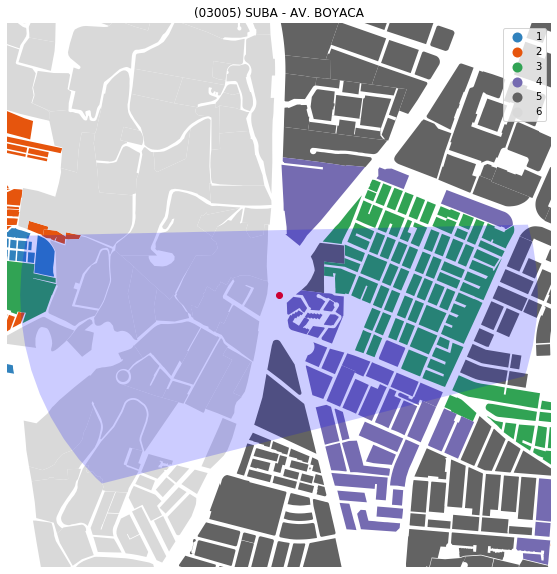

In [65]:
plot_stations('(03006) NIZA - CALLE 127', stations, blocks, catchment_areas)